References:
- https://www.kaggle.com/code/ashishpatel26/gan-beginner-tutorial-for-pytorch-celeba-dataset


In [2]:
import numpy as np
import jax.numpy as np
import torch, os
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dset
from torchvision import transforms
from torchvision.datasets import ImageFolder, CelebA
from torchvision.utils import save_image
from torchvision.utils import make_grid
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

### Hyperparameters

In [18]:
# image_size = 128
batch_size_train = 1
batch_size_val = 100
num_workers = 0
shuffle_loader = True
root = 'datasets/'
TARGET_ATTR = 'Eyeglasses'

In [19]:
transform = transforms.Compose([
    # transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset_train = CelebA(root=root, split='train', transform=transform, target_type='attr', download=False)
dataset_val = CelebA(root=root, split='valid', transform=transform, target_type='attr', download=False)
loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=shuffle_loader, num_workers=num_workers, drop_last=True)
loader_val = DataLoader(dataset=dataset_val, batch_size=batch_size_val, shuffle=False, num_workers=num_workers, drop_last=True)

In [20]:
ATTR = "5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young"
ATTR = {attr: attr_idx for attr_idx, attr in enumerate(ATTR.split(' '))}
target_attr = ATTR[TARGET_ATTR]

tensor([[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
torch.Size([1, 3, 218, 178])


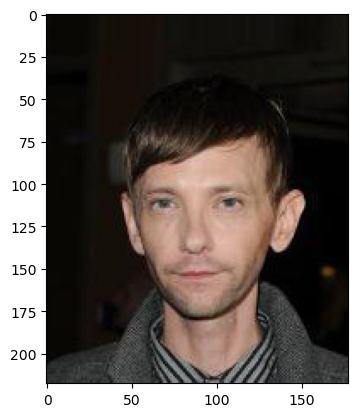

In [22]:
denorm = transforms.Normalize((-1,-1,-1),(2,2,2))

def im_show(img):
    img_denorm = denorm(img)
    img_t = torch.permute(img_denorm, (1,2,0))
    plt.imshow(img_t)

img_example, label_example = next(iter(loader_train))
print(label_example)
print(img_example.shape)
im_show(img_example[0])